Noise removal - PCA
* Using Greg's code - https://github.com/broadinstitute/lincs-profiling-complementarity/blob/master/3.clustering-pca/0.cp_pca_clustering_analysis.ipynb

Reading the normalized value dfs of standard CP plate and the chromalive plate 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


### Reading the normalized values 


In [ ]:
standard_normalized_df = pd.read_csv('C:\\Users\\ssivagur\\Documents\\Projects\\Cell_painting_projects\\CDoT\\BR00122250_normalized.csv', compression='gzip')
chromalive_normlized_df = pd.read_csv('C:\\Users\\ssivagur\\Documents\\Projects\\Cell_painting_projects\\CDoT\\BR00122249_normalized.csv', compression='gzip')

### Dropping metadata in the normalized values 

Standard Cell Painting dyes 

In [ ]:
std_df_dropped = [c for c in standard_normalized_df.columns if not c.startswith('Metadata')]
std_features_df = standard_normalized_df[std_df_dropped]
std_features_df
std_features_df.shape
std_features_df.isnull().sum().sum()

In [82]:
std_features_df.shape

(384, 7681)

In [50]:
#Filling NAs with 0
std_features_df_nafilled = std_features_df.fillna('0')

In [60]:
#Replacing infinity values with 0 
std_features_df_nafilled.replace([np.inf, -np.inf], 0, inplace=True)

Chromalive

In [80]:
chromalive_df_dropped = [c for c in chromalive_normlized_df.columns if not c.startswith('Metadata')]
chromalive_features_df = chromalive_normlized_df[chromalive_df_dropped]


In [81]:
chromalive_features_df.shape

(384, 7552)

In [83]:
chromalive_features_df.isnull().sum().sum()

31848

In [85]:
#filling NAs with 0
chromalive_features_df_nafilled = chromalive_features_df.fillna('0')

In [87]:
chromalive_features_df_nafilled.isnull().sum().sum()

0

In [89]:
#Replacing infinity values with 0 
chromalive_features_df_nafilled.replace([np.inf, -np.inf], 0, inplace=True)

Number of components is set at 150 

In [75]:
def transform_pca(df, no_of_pcs =150):
    """Perform PCA Analysis"""
    scaler = StandardScaler()
    scaled_agg = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(data = scaled_agg, columns = ['feat_' + str(x) for x in range(1,df.shape[1]+1)])
    #lets extract features with the most variance in our dataset
    pca = PCA(n_components=no_of_pcs)
    pc = pca.fit_transform(scaled_agg)
    df_pc = pd.DataFrame(data = pc, columns = ['PC' + str(x) for x in range(1,no_of_pcs+1)])

    #Plotting the Cumulative Summation of the Explained Variance
    plt.figure(figsize=(16, 8))
    fig = plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Principal Components')
    plt.xticks(np.arange(0, no_of_pcs+1, step=10))
    plt.show()

    return pca, df_pc, df_scaled 


### Standard Cell Painting dye 

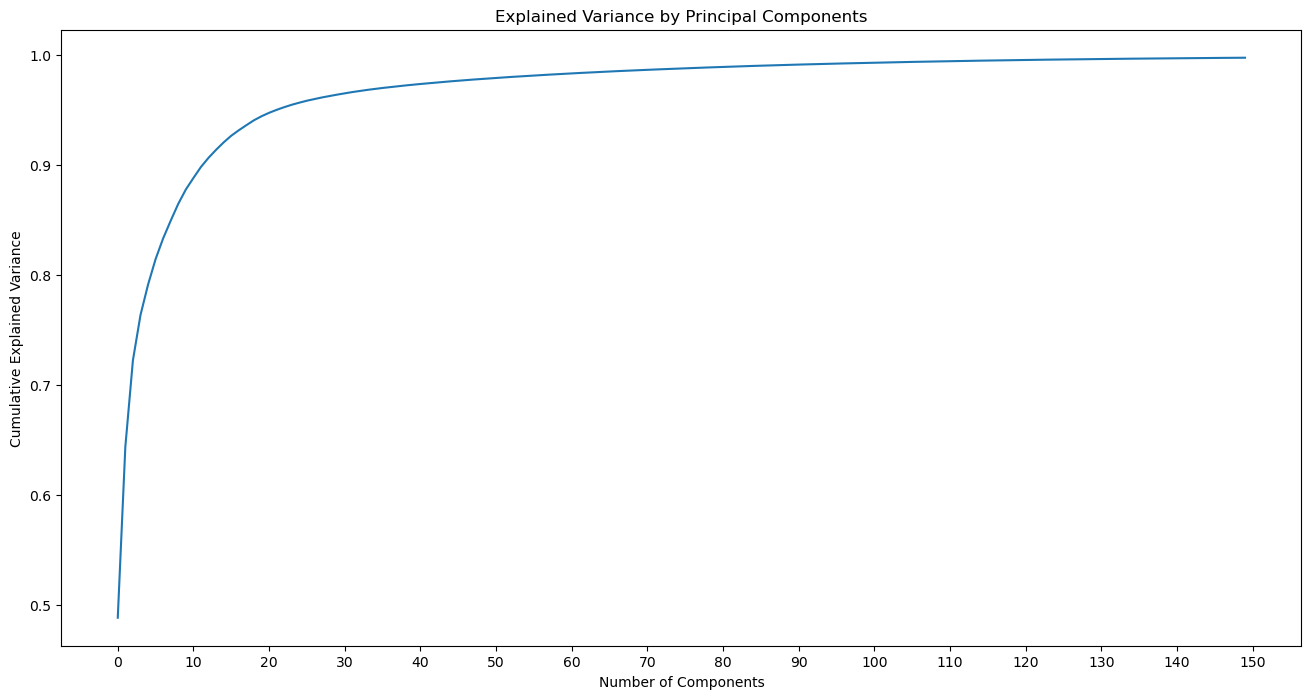

(PCA(n_components=150),
            PC1        PC2        PC3        PC4        PC5        PC6  \
 0   -20.278594  10.872906   5.740893  -5.608128   3.568104   1.361353   
 1   -30.425689 -14.439732   5.180841  -0.004354  -2.952551   3.872477   
 2   -31.410843  -8.926040  11.039007  -6.896455  -4.888239   1.557743   
 3   -22.642461  35.094557   5.215539 -19.383576  -0.100527 -14.616918   
 4   -21.599510 -17.658507  -5.915498   3.735589   1.725450  -3.615098   
 ..         ...        ...        ...        ...        ...        ...   
 379 -33.560365 -23.399170   9.222074  -3.547925   3.089044   4.140355   
 380 -29.202445  -7.732534   9.399259  -1.863369  11.294624   3.624379   
 381 -34.211570 -13.483477  17.610365 -10.765982  10.421651   5.358430   
 382 -42.364209 -16.035963  35.583380 -13.283547  15.320784  13.529357   
 383 -47.462447   3.736477  50.689142 -22.815321  24.323373  23.153002   
 
            PC7        PC8        PC9       PC10  ...     PC141     PC142  \
 0    -5.

In [69]:
transform_pca(std_features_df_nafilled)

### Chromalive 

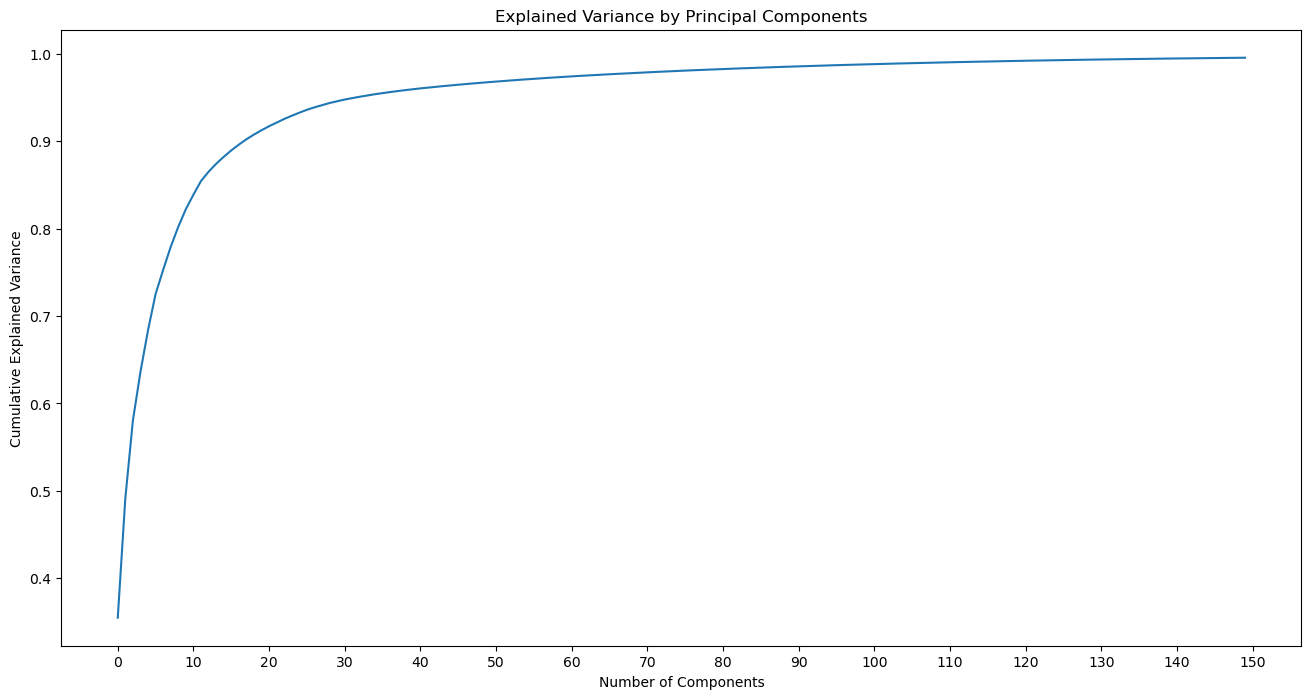

(PCA(n_components=150),
            PC1        PC2        PC3        PC4        PC5        PC6  \
 0    -1.719666  39.266926   4.596941  33.300513   7.110997   9.074370   
 1   -14.651515   0.365648  27.906907  23.560787  -4.884640  -4.999996   
 2   -15.134259   5.126217  28.258509   9.067042  -3.499062  -3.443676   
 3   -25.974845  27.857191 -57.240070  91.021595  50.398487  19.789320   
 4   -18.435184  40.300666  15.689488  14.085296   4.802040   8.976245   
 ..         ...        ...        ...        ...        ...        ...   
 379 -18.081152 -11.750564 -15.419585 -11.153031   4.988560   3.571455   
 380 -16.970672 -43.950507 -29.928030  -8.125377   2.674088   5.573398   
 381 -18.659247   5.572467  -1.831257 -20.674785   2.773319   6.365552   
 382 -19.460107   2.899800 -10.162060 -16.840983   3.116537   9.479255   
 383 -16.102908  19.532214 -27.278941  -8.549246  10.264766  14.113800   
 
            PC7        PC8        PC9       PC10  ...     PC141     PC142  \
 0    18.

In [90]:
transform_pca(chromalive_features_df_nafilled)

### Default number of components is used; Default value = None  

In [78]:
def transform_pca_default(df, no_of_pcs =150):
    """Perform PCA Analysis"""
    scaler = StandardScaler()
    scaled_agg = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(data = scaled_agg, columns = ['feat_' + str(x) for x in range(1,df.shape[1]+1)])
    #lets extract features with the most variance in our dataset
    pca = PCA()
    pc = pca.fit_transform(scaled_agg)
    df_pc = pd.DataFrame(data = pc)

    #Plotting the Cumulative Summation of the Explained Variance
    plt.figure(figsize=(16, 8))
    fig = plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Principal Components')
    #plt.xticks(np.arange(0, no_of_pcs+1, step=10))
    plt.show()

    return pca, df_pc, df_scaled 

Standard CellPainting 

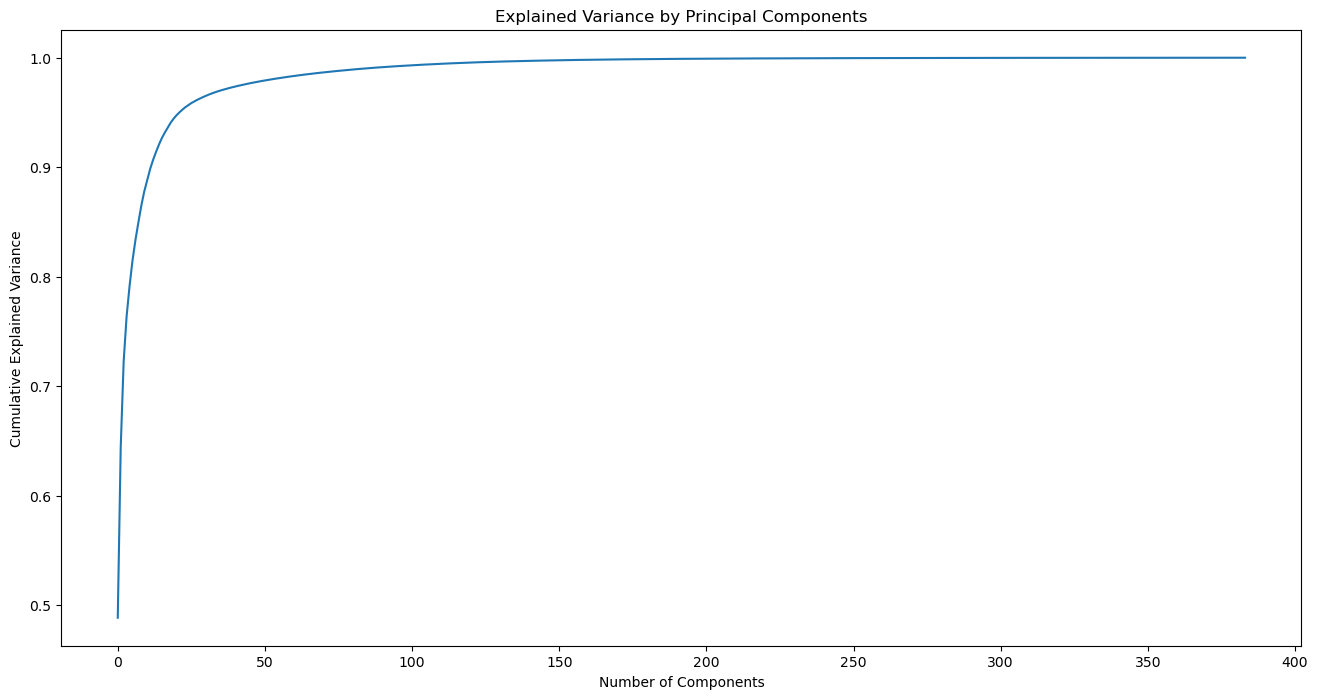

(PCA(),
            0          1          2          3          4          5    \
 0   -20.278594  10.872906   5.740893  -5.608128   3.568104   1.361353   
 1   -30.425689 -14.439732   5.180841  -0.004354  -2.952551   3.872477   
 2   -31.410843  -8.926040  11.039007  -6.896455  -4.888239   1.557743   
 3   -22.642461  35.094557   5.215539 -19.383576  -0.100527 -14.616918   
 4   -21.599510 -17.658507  -5.915498   3.735589   1.725450  -3.615098   
 ..         ...        ...        ...        ...        ...        ...   
 379 -33.560365 -23.399170   9.222074  -3.547925   3.089044   4.140355   
 380 -29.202445  -7.732534   9.399259  -1.863369  11.294624   3.624379   
 381 -34.211570 -13.483477  17.610365 -10.765982  10.421651   5.358430   
 382 -42.364209 -16.035963  35.583380 -13.283547  15.320784  13.529357   
 383 -47.462447   3.736477  50.689142 -22.815321  24.323373  23.153002   
 
            6          7          8          9    ...       374       375  \
 0    -5.135349 -22.66442

In [79]:
transform_pca_default(std_features_df_nafilled)

In [93]:
df_pc

NameError: name 'df_pc' is not defined

Chromalive

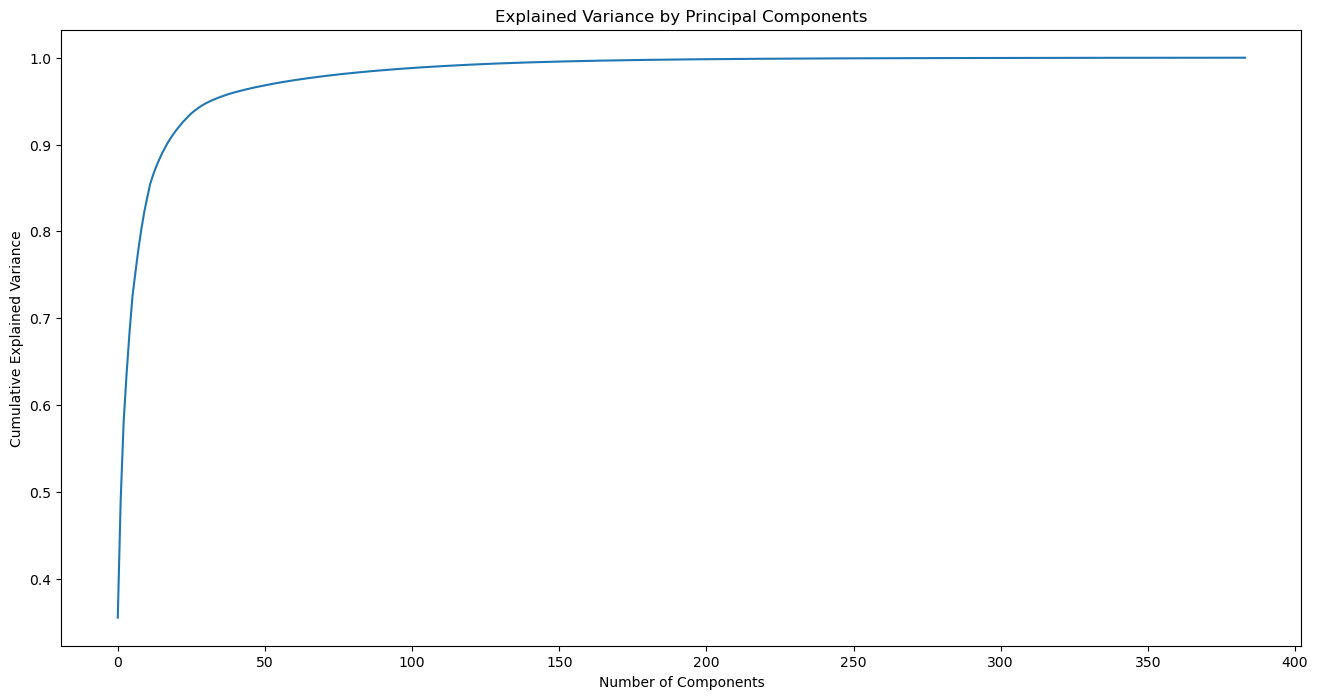

(PCA(),
            0          1          2          3          4          5    \
 0    -1.719666  39.266926   4.596941  33.300513   7.110997   9.074370   
 1   -14.651515   0.365648  27.906907  23.560787  -4.884640  -4.999996   
 2   -15.134259   5.126217  28.258509   9.067042  -3.499062  -3.443676   
 3   -25.974845  27.857191 -57.240070  91.021595  50.398487  19.789320   
 4   -18.435184  40.300666  15.689488  14.085296   4.802040   8.976245   
 ..         ...        ...        ...        ...        ...        ...   
 379 -18.081152 -11.750564 -15.419585 -11.153031   4.988560   3.571455   
 380 -16.970672 -43.950507 -29.928030  -8.125377   2.674088   5.573398   
 381 -18.659247   5.572467  -1.831257 -20.674785   2.773319   6.365552   
 382 -19.460107   2.899800 -10.162060 -16.840983   3.116537   9.479255   
 383 -16.102908  19.532214 -27.278941  -8.549246  10.264766  14.113800   
 
            6          7          8          9    ...       374       375  \
 0    18.224288 -24.43813

In [92]:
 transform_pca_default(chromalive_features_df_nafilled)